In [24]:
import pandas as pd
import numpy as np

In [187]:
esl = pd.read_csv('eslKillFeed.csv')
esl.head()
esl[esl['Player']=='Poach']

Player    KilledBy   Weapon  Distance  Storm Phase Timestamp  Match  \
76   Poach        Chap  Shotgun       NaN          2.0     11:00      1   
136  Poach  Razzzero0o   Splode       NaN          5.0     19:10      2   
273  Poach     Inclyde  Shotgun       NaN          2.0      9:46      3   
379  Poach      Madzen  Shotgun       NaN          1.0      7:15      4   
440  Poach      Aspect   Sniper      15.0          6.0     19:23      5   
583  Poach      Madzen  Shotgun       NaN          1.0      5:24      6   
698  Poach      Madzen  Shotgun       NaN          0.0      1:26      7   

     Placed  Kills  
76       77      0  
136      37      2  
273      74      0  
379      80      0  
440      41      1  
583      84      0  
698      99      0

In [188]:
esl_placement_points = {1:65,2:58,3:56,4:54,5:52,6:50,7:48,8:46,9:44,10:42,11:40,12:39,13:38,14:37,15:36,16:35,17:34,18:33,19:32,20:31,21:30,22:29,23:28,24:27,25:26,26:25,27:24,28:23,29:22,30:21,31:20,32:19,33:18,34:17,35:16,36:15,37:14,38:13,39:12,40:11,41:10,42:9,43:8,44:7,45:6,46:5,47:4,48:3,49:2,50:1}

In [205]:
esl_p = pd.DataFrame(index = esl['Player'].unique(), columns=['Points', 'Victory Royales', 'Kill Points', 'Kills', 'Placement Points']).fillna(0)
for i, row in esl.iterrows():
    esl_p['Kills'][row['Player']] += row['Kills']
    esl_p['Points'][row['Player']] += row['Kills']*5
    esl_p['Kill Points'][row['Player']] += row['Kills']*5
    if (row['Placed'] < 51):
        esl_p['Points'][row['Player']] += esl_placement_points[row['Placed']]
        esl_p['Placement Points'][row['Player']] += esl_placement_points[row['Placed']]
    if (row['Placed']==1):
        esl_p['Victory Royales'][row['Player']] +=1
esl_p['Avg. Placement'] = esl.groupby('Player')['Placed'].mean()
esl_p = esl_p.sort_values(['Points','Victory Royales','Kills', 'Avg. Placement'], ascending=[False, False, False, True]).reset_index()
esl_p.index+=1
esl_p = esl_p.reset_index().rename(columns={'level_0':'Rank', 'index':'Player'})

In [210]:
esl_p[75:100]

Rank      Player  Points  Victory Royales  Kill Points  Kills  \
75    76        Sk1x      66                0           15      3   
76    77     Andeeza      64                0           25      5   
77    78      Kejser      64                0           15      3   
78    79      Keolys      63                0           35      7   
79    80      Coffeh      63                0           15      3   
80    81        Jarl      62                0           25      5   
81    82      Stompy      53                0            5      1   
82    83  Windwalker      52                0           10      2   
83    84     Lil Jay      51                0           10      2   
84    85     Inclyde      48                0           30      6   
85    86       Khuna      44                0           20      4   
86    87       Poach      39                0           15      3   
87    88       Cloud      39                0           10      2   
88    89     Sak0ner      39                0            5      1   
89    90    Taiovsky      35                0            5      1   
90    91   Maxalibur      27                0           20      4   
91    92        Myth      25                0           15      3   
92    93       Marki      19                0            5      1   
93    94        Faah      15                0           15      3   
94    95      Lolito      10                0           10      2   
95    96     Mushway      10                0           10      2   
96    97        Eryc       5                0            5      1   
97    98       Pow3r       5                0            5      1   
98    99      Rizart       2                0            0      0   
99   100   Viallinen       0                0            0      0   

    Placement Points  Avg. Placement  
75                51       60.857143  
76                39       48.000000  
77                49       53.000000  
78                28       63.142857  
79                48       61.857143  
80                37       69.285714  
81                48       55.857143  
82                42       56.857143  
83                41       63.857143  
84                18       64.857143  
85                24       65.142857  
86                24       70.285714  
87                29       58.714286  
88                34       72.857143  
89                30       59.142857  
90                 7       78.000000  
91                10       74.571429  
92                14       72.285714  
93                 0       73.285714  
94                 0       76.000000  
95                 0       85.428571  
96                 0       74.857143  
97                 0       80.285714  
98                 2       74.000000  
99                 0       72.285714

In [214]:
esl_p.sort_values('Avg. Placement').head(10)

Rank    Player  Points  Victory Royales  Kill Points  Kills  \
0      1   Vinny1x     329                0           75     15   
2      3  Kinstaar     269                1           50     10   
4      5     Skite     248                0           55     11   
1      2     Magin     316                0           85     17   
7      8     Skram     237                1           45      9   
6      7      Zayt     244                0           40      8   
20    21     Motor     185                0           30      6   
3      4    Bizzle     255                1           45      9   
11    12     Itemm     223                0           35      7   
15    16     Mitr0     205                0           45      9   

    Placement Points  Avg. Placement  
0                254       21.571429  
2                219       23.000000  
4                193       24.714286  
1                231       25.714286  
7                192       25.714286  
6                204       27.857143  
20               155       28.857143  
3                210       29.714286  
11               188       30.285714  
15               160       31.857143

In [216]:
esl_p.sort_values('Kills', ascending=False).head(10)

Rank    Player  Points  Victory Royales  Kill Points  Kills  \
1      2     Magin     316                0           85     17   
35    36     Aydan     154                0           80     16   
10    11  Histtory     224                0           80     16   
0      1   Vinny1x     329                0           75     15   
13    14    Hoopek     208                0           70     14   
8      9      Ares     233                0           70     14   
28    29    Madzen     175                0           65     13   
37    38      Issa     151                0           60     12   
30    31    Villex     160                0           60     12   
31    32     Tommo     157                0           60     12   

    Placement Points  Avg. Placement  
1                231       25.714286  
35                74       53.428571  
10               144       38.142857  
0                254       21.571429  
13               138       37.000000  
8                163       34.142857  
28               110       46.571429  
37                91       53.285714  
30               100       47.428571  
31                97       57.142857

In [117]:
ss = pd.read_csv('SecretSkirmishKillFeed.csv')
ss.dtypes

Player          object
KilledBy        object
Weapon          object
Distance       float64
Storm Phase      int64
Timestamp       object
Match          float64
Placed           int64
Kills            int64
dtype: object

In [118]:
ss_placement_points = {1:3,2:2,3:2,4:1,5:1,6:1,7:1,8:1,9:1,10:1}
ss_kill_points = {0:0, 1:0, 2:0, 3:1, 4:1, 5:2, 6:2, 7:3, 8:4, 9:5, 10:6, 11:7, 12:8, 13:9, 14:10, 15:11, 16:12, 17:13, 18:14, 19:15, 20:16, 21:17}

In [218]:
ss_p = pd.DataFrame(index = ss['Player'].unique(), columns=['Points', 'Victory Royales', 'Kill Points', 'Kills', 'Placement Points']).fillna(0)
for i, row in ss.iterrows():
    ss_p['Kills'][row['Player']] += row['Kills']
    ss_p['Points'][row['Player']] += ss_kill_points[row['Kills']]
    ss_p['Kill Points'][row['Player']] += ss_kill_points[row['Kills']]
    if (row['Placed'] < 11):
        ss_p['Points'][row['Player']] += ss_placement_points[row['Placed']]
        ss_p['Placement Points'][row['Player']] += ss_placement_points[row['Placed']]
    if (row['Placed']==1):
        ss_p['Victory Royales'][row['Player']] +=1
ss_p['Avg. Placement'] = ss.groupby('Player')['Placed'].mean()
ss_p = ss_p.sort_values(['Points','Victory Royales','Kills','Avg. Placement'], ascending=[False, False, False, True]).reset_index()
ss_p.index+=1
ss_p = ss_p.reset_index().rename(columns={'level_0':'Rank', 'index':'Player'})

In [219]:
ss_p.head()

Rank  Player  Points  Victory Royales  Kill Points  Kills  \
0     1  Bizzle      12                2            4     17   
1     2     Saf      11                1            6     20   
2     3   Vivid       9                1            5     17   
3     4   Kyzui       8                0            4     12   
4     5   Pearl       7                1            4     14   

   Placement Points  Avg. Placement  
0                 8       15.833333  
1                 5       13.833333  
2                 4       34.000000  
3                 4       30.000000  
4                 3       33.166667

In [304]:
import matplotlib.pyplot as plt
from matplotlib import cm
import datetime as dt
%matplotlib inline

C:\Users\eduar\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


[Text(0, 0, '0:00'),
 Text(0, 0, '5:00'),
 Text(0, 0, '10:00'),
 Text(0, 0, '15:00'),
 Text(0, 0, '20:00')]

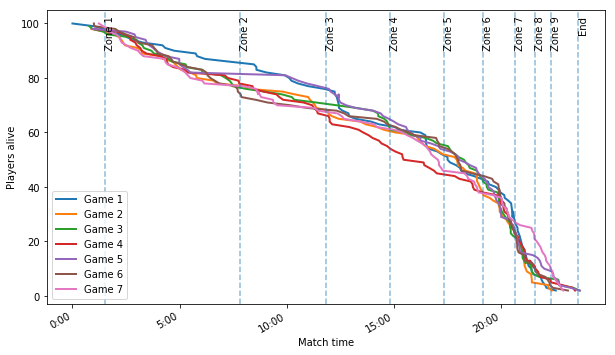

In [328]:
fig, ax = plt.subplots(figsize=(10,6))
for i in range(1,8):
    tmp = esl[(esl['Match']==i) & (esl['Timestamp'] != np.NaN)]
    tmp['Timestamp'] = pd.to_datetime(tmp['Timestamp'], format='%M:%S')
    tmp.plot('Timestamp', 'Placed',ax=ax, label='Game {}'.format(i), linewidth=2)
timestamps = ['1:30', '7:50', '11:50', '14:50', '17:20', '19:10', '20:40', '21:35', '22:20','23:35']
for i, time in enumerate(timestamps):
    ax.axvline(pd.to_datetime(time, format='%M:%S'), linestyle='--', alpha=0.5)
    ax.text(pd.to_datetime(time, format='%M:%S'),100, 'Zone %d' % (i+1) if i < 9 else 'End', rotation=90)
ax.set_xlabel('Match time')
ax.set_ylabel('Players alive')
ax.set_xticklabels(['0:00', '5:00', '10:00', '15:00', '20:00'])

C:\Users\eduar\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\eduar\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


[Text(0, 0, '0:00'),
 Text(0, 0, '5:00'),
 Text(0, 0, '10:00'),
 Text(0, 0, '15:00'),
 Text(0, 0, '20:00')]

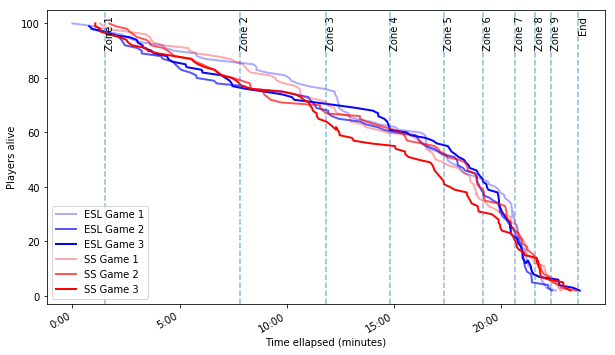

In [327]:
fig, ax = plt.subplots(figsize=(10,6))
for i in range(1,4):
    tmp = esl[(esl['Match']==i) & (esl['Timestamp'] != np.NaN)]
    tmp['Timestamp'] = pd.to_datetime(tmp['Timestamp'], format='%M:%S')
    tmp.plot('Timestamp', 'Placed',ax=ax, label='ESL Game {}'.format(i), linewidth=2, color='blue', alpha=0.33*i)
for i in range(1,4):
    tmp = ss[(ss['Match']==i) & (ss['Timestamp'] != np.NaN)]
    tmp['Timestamp'] = pd.to_datetime(tmp['Timestamp'], format='%M:%S')
    tmp.plot('Timestamp', 'Placed',ax=ax, label='SS Game {}'.format(i), linewidth=2, color='red', alpha=0.33*i)
timestamps = ['1:30', '7:50', '11:50', '14:50', '17:20', '19:10', '20:40', '21:35', '22:20','23:35']
for i, time in enumerate(timestamps):
    ax.axvline(pd.to_datetime(time, format='%M:%S'), linestyle='--', alpha=0.5)
    ax.text(pd.to_datetime(time, format='%M:%S'),100, 'Zone %d' % (i+1) if i < 9 else 'End', rotation=90)
ax.set_xlabel('Time ellapsed (minutes)')
ax.set_ylabel('Players alive')
ax.set_xticklabels(['0:00', '5:00', '10:00', '15:00', '20:00'])

<IPython.core.display.Javascript object>


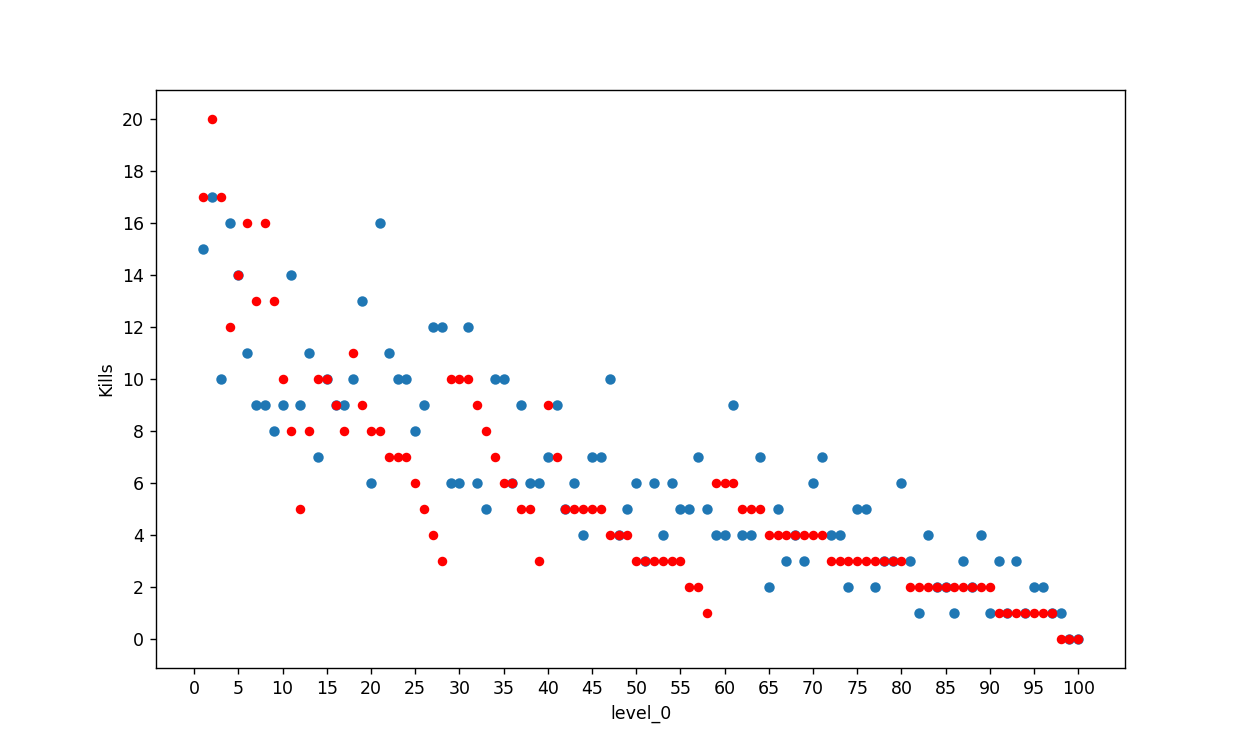

In [201]:
fig, ax = plt.subplots(figsize=(10,6))
esl_p.plot.scatter(x='level_0', y='Kills', ax=ax, s=25)
ss_p.plot.scatter(x='level_0', y='Kills', ax=ax,color='r')
ax.set_yticks(np.arange(0,22,2))
ax.set_xticks(np.arange(0,101,5))

<IPython.core.display.Javascript object>


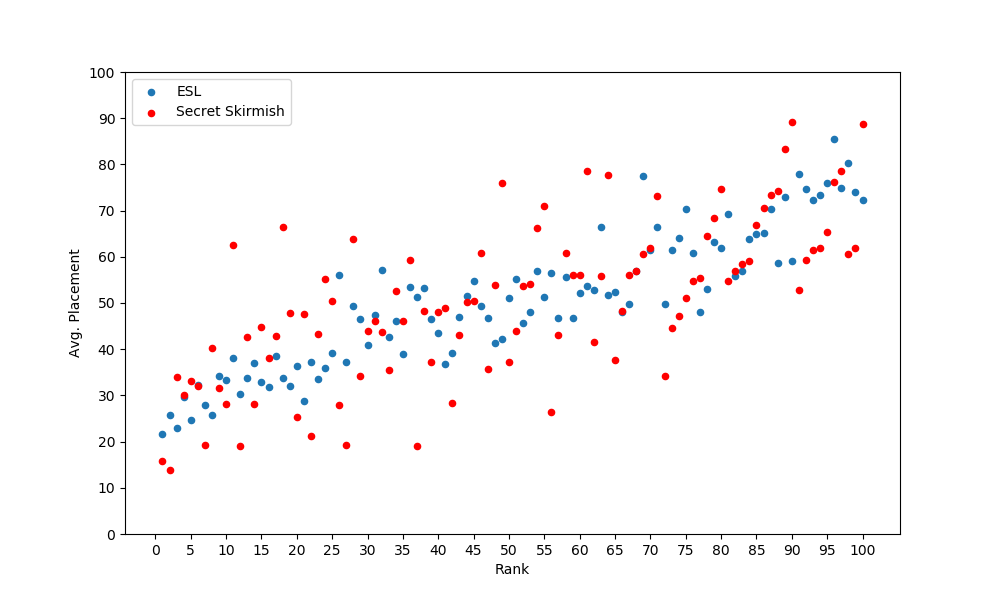

In [221]:
fig, ax = plt.subplots(figsize=(10,6))
esl_p.plot.scatter(x='Rank', y='Avg. Placement', ax=ax, label='ESL')
ss_p.plot.scatter(x='Rank', y='Avg. Placement', ax=ax, color='r', label='Secret Skirmish')
ax.set_xticks(np.arange(0,101,5))
ax.set_yticks(np.arange(0,101,10))

In [128]:
from scipy import stats

In [237]:
stats.pearsonr(ss_p['level_0'], ss_p['Avg. Placement'])

KeyError: 'level_0'

In [289]:
top20 = esl_p['Player'].head(20).tolist()
esl_20 = esl[esl['KilledBy'].isin(top20)]
esl_20['Timestamp'] = pd.to_datetime(esl_20['Timestamp'], format='%M:%S')
esl_20['Timestamp'] = (esl_20['Timestamp'].dt.minute * 60) + esl_20['Timestamp'].dt.second
order = dict(zip(top20, range(len(top20))))
esl_20['order'] = esl_20['KilledBy'].map(order)
esl_20 = esl_20.sort_values('order')
esl_20_d = esl[esl['Player'].isin(top20)]
esl_20_d['Timestamp'] = pd.to_datetime(esl_20_d['Timestamp'], format='%M:%S')
esl_20_d['Timestamp'] = (esl_20_d['Timestamp'].dt.minute * 60) + esl_20_d['Timestamp'].dt.second
esl_20_d['order'] = esl_20_d['Player'].map(order)
esl_20_d = esl_20_d.sort_values('order')
esl_20_d

C:\Users\eduar\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\eduar\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\eduar\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

Player   KilledBy      Weapon  Distance  Storm Phase  Timestamp  Match  \
611   Vinny1x        NaN  FallDamage      30.0          8.0     1331.0      7   
503   Vinny1x       Ares     Shotgun       NaN          8.0     1337.0      6   
3     Vinny1x      Skite     Shotgun       NaN          8.0     1323.0      1   
477   Vinny1x       Nero       Rifle       NaN          2.0      656.0      5   
137   Vinny1x      Tommo         Smg       NaN          5.0     1149.0      2   
305   Vinny1x  Aimhero_o         NaN       NaN          8.0     1338.0      4   
208   Vinny1x       Vato         NaN       NaN          7.0     1286.0      3   
85      Magin    Zyppaan      Sniper      38.0          1.0      439.0      1   
620     Magin     Zexrow         Smg       NaN          7.0     1293.0      7   
304     Magin   Histtory         NaN       NaN          8.0     1340.0      4   
502     Magin       Ares     Shotgun       NaN          8.0     1345.0      6   
205     Magin        NaN       Storm       NaN          9.0     1360.0      3   
413     Magin      Skram     Shotgun       NaN          8.0     1302.0      5   
144     Magin     Zexrow       Rifle       NaN          5.0     1127.0      2   
610  Kinstaar      Fwexy         Smg       NaN          8.0     1337.0      7   
350  Kinstaar    Pr0vokd       Rifle       NaN          4.0      924.0      4   
7    Kinstaar      Tommo     Shotgun       NaN          7.0     1290.0      1   
449  Kinstaar     Bizzle       Rifle       NaN          5.0     1082.0      5   
505  Kinstaar    Vinny1x     Shotgun       NaN          8.0     1330.0      6   
100  Kinstaar        NaN         NaN       NaN          8.0        NaN      2   
233  Kinstaar      Magin         Smg       NaN          6.0     1194.0      3   
112    Bizzle        NaN  FallDamage      21.0          7.0     1264.0      2   
530    Bizzle     Villex         Smg       NaN          6.0     1217.0      6   
0      Bizzle        NaN         NaN       NaN          8.0        NaN      1   
293    Bizzle    x2Jesse         Smg       NaN          1.0      180.0      3   
311    Bizzle     Jarkos       Rifle       NaN          7.0     1280.0      4   
648    Bizzle   Histtory         Smg       NaN          4.0     1026.0      7   
407    Bizzle        NaN  FallDamage       NaN          9.0     1346.0      5   
616     Skite       Zayt     Shotgun       NaN          8.0     1313.0      7   
428     Skite     Povity       Rifle       NaN          6.0     1200.0      5   
..        ...        ...         ...       ...          ...        ...    ...   
403     Mitr0        NaN       Storm       NaN          9.0     1362.0      5   
354     Mitr0   Svennoss       Rifle       NaN          3.0      881.0      4   
214  Funkbomb    x2Jesse         NaN       NaN          7.0     1260.0      3   
39   Funkbomb    Vinny1x     Shotgun       NaN          6.0     1185.0      1   
410  Funkbomb     Aspect         NaN       NaN          8.0     1313.0      5   
327  Funkbomb      Milan       Rifle       NaN          6.0     1226.0      4   
599  Funkbomb    Jamside         Smg       NaN          0.0       60.0      6   
669  Funkbomb     Hoopek     Shotgun       NaN          2.0      573.0      7   
105  Funkbomb        NaN       Storm       NaN          7.0     1286.0      2   
519   Beehive       Ares     Shotgun       NaN          7.0     1243.0      6   
416   Beehive      Aydan         Smg       NaN          7.0     1252.0      5   
77    Beehive       Envy     Shotgun       NaN          2.0      631.0      1   
677   Beehive     Faxfox     Shotgun       NaN          1.0      369.0      7   
317   Beehive    Zyppaan     Shotgun       NaN          7.0     1261.0      4   
109   Beehive   Kinstaar     Shotgun       NaN          7.0     1269.0      2   
215   Beehive      Magin         NaN       NaN          7.0     1259.0      3   
163     Vivid       Ares       Rifle       NaN          3.0      806.0      2   
421     Vivid     Bizzle     Shotgun  

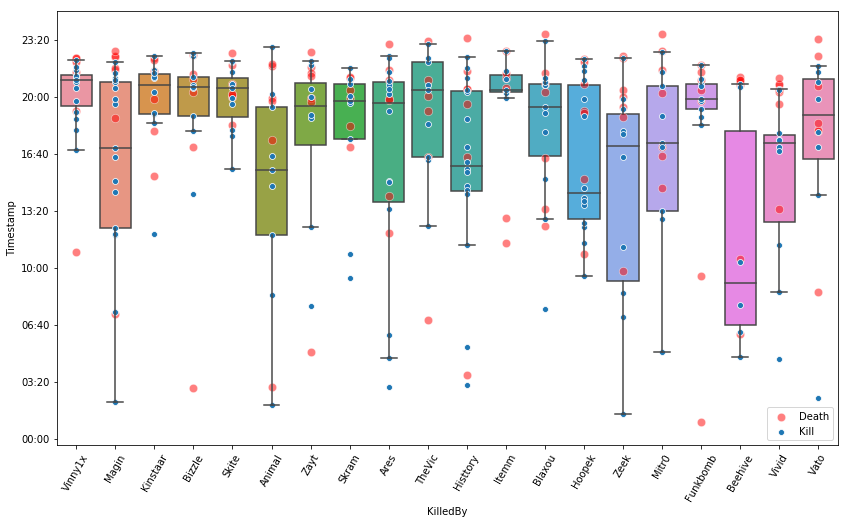

In [313]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(14,8))
sns.boxplot(x='KilledBy', y='Timestamp', ax=ax, data=esl_20, showfliers=False)
sns.scatterplot(x='Player', y='Timestamp', ax=ax, data=esl_20_d, color='r', s=70, alpha=0.5,label='Death')
sns.scatterplot(x='KilledBy', y='Timestamp', ax=ax, data=esl_20, label='Kill')

ax.tick_params('x', rotation=60)
ax.set_yticklabels([pd.to_datetime(tm, unit='s').strftime('%M:%S') for tm in ax.get_yticks()])
ax.legend(loc='lower right')

In [181]:
ss_p = pd.DataFrame(index = esl['Player'].unique(), columns=['Points', 'Victory Royales', 'Kill Points', 'Kills', 'Placement Points']).fillna(0)
for i, row in esl.iterrows():
    ss_p['Kills'][row['Player']] += row['Kills']
    ss_p['Points'][row['Player']] += ss_kill_points[row['Kills']]
    ss_p['Kill Points'][row['Player']] += ss_kill_points[row['Kills']]
    if (row['Placed'] < 11):
        ss_p['Points'][row['Player']] += ss_placement_points[row['Placed']]
        ss_p['Placement Points'][row['Player']] += ss_placement_points[row['Placed']]
    if (row['Placed']==1):
        ss_p['Victory Royales'][row['Player']] +=1
ss_p['Avg. Placement'] = esl.groupby('Player')['Placed'].mean()
ss_p = ss_p.sort_values(['Points','Victory Royales','Kills','Avg. Placement'], ascending=[False, False, False, True]).reset_index()
ss_p.index+=1
ss_p = ss_p.reset_index().rename(columns={'level_0':'Rank', 'index':'Player'})

In [182]:
ss_p

Rank       Player  Points  Victory Royales  Kill Points  Kills  \
0      1        Magin       9                0            5     17   
1      2      Vinny1x       8                0            4     15   
2      3     Kinstaar       7                1            2     10   
3      4        Julez       6                1            2     10   
4      5       Bizzle       6                1            2      9   
5      6       TheVic       6                1            1      9   
6      7     Histtory       6                0            4     16   
7      8        Aydan       6                0            5     16   
8      9         Ares       6                0            3     14   
9     10       Jarkos       6                0            3     10   
10    11        Skram       5                1            2      9   
11    12       Animal       5                1            0      9   
12    13       Hoopek       5                0            3     14   
13    14       Madzen       5                0            4     13   
14    15        Skite       5                0            3     11   
15    16       Blaxou       5                0            2     11   
16    17        Smeef       5                0            3     10   
17    18       Sinooh       5                0            2      9   
18    19    Aimhero_o       4                1            1      7   
19    20        Tommo       4                0            3     12   
20    21         Zeek       4                0            2     10   
21    22        Mitr0       4                0            1      9   
22    23         Zayt       4                0            1      8   
23    24         Vato       4                0            1      8   
24    25       Zexrow       4                0            1      6   
25    26   Razzzero0o       4                0            2      6   
26    27       Villex       3                0            2     12   
27    28         Issa       3                0            2     12   
28    29      Jamside       3                0            2     10   
29    30     Funkbomb       3                0            2      9   
..   ...          ...     ...              ...          ...    ...   
70    71        Alpha       0                0            0      4   
71    72      K1nzell       0                0            0      4   
72    73      Mirwana       0                0            0      4   
73    74       Faxfox       0                0            0      4   
74    75        Xlsma       0                0            0      4   
75    76       Teeqzy       0                0            0      4   
76    77    Maxalibur       0                0            0      4   
77    78         Nero       0                0            0      3   
78    79          Saf       0                0            0      3   
79    80       Kejser       0                0            0      3   
80    81         Sk1x       0                0            0      3   
81    82        Poach       0                0            0      3   
82    83         Faah       0                0            0      3   
83    84         Myth       0                0            0      3   
84    85  Crazy Llama       0                0            0      2   
85    86         Chap       0                0            0      2   
86    87   Windwalker       0                0            0      2   
87    88        Cloud       0                0            0      2   
88    89      Lil Jay       0                0            0      2   
89    90       Lolito       0                0            0      2   
90    91      Mushway       0                0            0      2   
91    92       Stompy       0                0            0      1   
92    93     Taiovsky       0                0            0      1   
93    94       Hunter       0                0            0      1   
94    95        Marki       0                0            0      1   
95    96      

In [235]:
esl[esl['KilledBy']=='Bizzle']

Player KilledBy   Weapon  Distance  Storm Phase Timestamp  Match  \
1       Skite   Bizzle      Smg       NaN          8.0     22:33      1   
14    Pr0vokd   Bizzle      Smg       NaN          7.0     21:09      1   
31    Lil Jay   Bizzle    Rifle       NaN          6.0     20:30      1   
62       Envy   Bizzle      Smg       NaN          3.0     14:18      1   
323    Bloodx   Bizzle  Shotgun       NaN          6.0     20:36      4   
408      Vato   Bizzle      NaN       NaN          8.0     22:22      5   
421     Vivid   Bizzle  Shotgun       NaN          6.0     20:43      5   
445   Airwaks   Bizzle   Splode      70.0          5.0     18:52      5   
449  Kinstaar   Bizzle    Rifle       NaN          5.0     18:02      5   

     Placed  Kills  
1         2      7  
14       15      2  
31       32      0  
62       63      4  
323      24      0  
408       9      1  
421      22      3  
445      46      0  
449      50      0